In [18]:
# Import torch and torchvision modules
import torch
from torchvision import models, transforms

In [20]:
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [3]:
list(dir(models))

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [4]:
AlexNet = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/rahul/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:24<00:00, 10.1MB/s]   


In [5]:
print(AlexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
!wget https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt

--2020-08-22 10:05:17--  https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.152.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.152.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21674 (21K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  21.17K  --.-KB/s    in 0.02s   

2020-08-22 10:05:18 (995 KB/s) - ‘imagenet_classes.txt’ saved [21674/21674]



In [7]:
# Load labels
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [9]:
len(classes)

1000

In [10]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG -O test.jp

--2020-08-22 10:06:19--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108037 (106K) [image/jpeg]
Saving to: ‘test.jp’

test.jp             100%[===================>] 105.50K   694KB/s    in 0.2s    

2020-08-22 10:06:19 (694 KB/s) - ‘test.jp’ saved [108037/108037]



In [13]:
os.listdir()

['Basic_MLP.ipynb',
 'test.jp',
 'Implementing_LeNet.ipynb',
 'README.md',
 'Classification_Metrics.ipynb',
 'LeNet_with_BatchNorm.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'Pretrained_Classification_Models_in_Torchvision.ipynb',
 'imagenet_classes.txt']

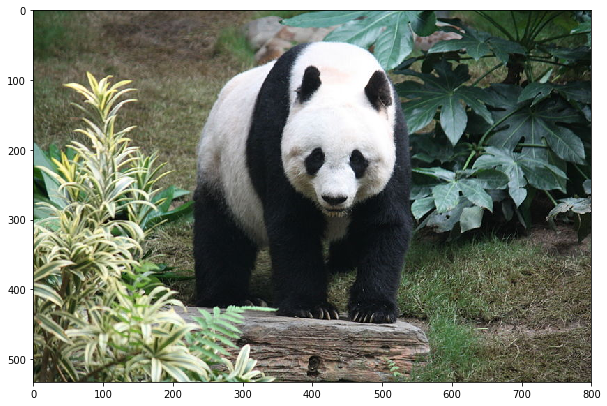

In [17]:
img_ = cv2.imread('test.jp')
plt.figure(figsize=(10, 10))
plt.imshow(img_[:,:,::-1])
plt.show()

In [22]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
img = Image.open('test.jp')
img_t = transform(img)

In [29]:
# Create a mini-batch 
batch_t = torch.unsqueeze(img_t, 0)

In [32]:
print(img_t.shape)
print(batch_t.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [33]:
out = AlexNet(batch_t)

In [34]:
print(out.shape)
print(out)

torch.Size([1, 1000])
tensor([[-2.8770e+00, -5.4437e+00, -1.4674e+00, -7.7772e+00, -5.5260e+00,
         -5.3041e+00, -1.7882e-01,  1.7268e-01,  4.6116e+00,  2.8423e+00,
         -9.7599e+00, -3.0726e+00, -3.2103e+00, -3.8344e+00, -6.2040e-01,
         -5.1042e+00, -2.4378e+00,  6.6979e+00,  9.6234e+00,  4.3891e+00,
         -5.5584e+00,  3.2822e+00,  1.0765e+00,  1.3334e+01,  2.6394e+00,
         -1.8680e+00, -4.3786e+00, -1.2634e+01, -1.5697e+00, -9.1649e-01,
         -4.0523e+00, -4.8230e+00, -4.1836e+00, -1.1855e+00, -6.7568e-01,
          7.2643e-01,  8.8284e+00, -1.2324e+00, -6.9861e+00, -4.1188e+00,
         -5.7015e+00, -6.5320e+00, -5.3767e+00, -6.9889e+00, -7.7626e+00,
         -5.0538e+00, -4.1894e+00, -7.6491e+00, -3.0462e+00, -6.6173e+00,
         -3.0092e+00,  3.2310e+00, -5.9294e+00, -2.1383e+00, -2.6969e+00,
         -5.3145e+00,  2.1715e+00, -5.1422e+00, -2.2451e+00, -6.9027e+00,
         -4.3901e+00, -1.6229e+00, -3.0026e+00, -2.5944e+00, -6.8728e+00,
         -5.3025

In [35]:
_, indices = torch.sort(out, descending = True)

In [36]:
percentage = torch.nn.functional.softmax(out, dim = 1)[0] * 100

In [48]:
for idx in indices[0][:5]:
    print(classes[idx], ": ", percentage[idx].item())

giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca :  99.99737548828125
colobus, colobus monkey :  0.0026250279042869806
skunk, polecat, wood pussy :  4.899541181657696e-07
soccer ball :  2.3501797841163352e-07
guenon, guenon monkey :  1.499723509823525e-07


In [38]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Inference(classification)_pretrained_models_torch.ipynb
	imagenet_classes.txt
	test.jp

nothing added to commit but untracked files present (use "git add" to track)


In [45]:
!git add .

In [46]:
!git commit -m "alexnet_classification"

[master 489fddd] alexnet_classification
 4 files changed, 1710 insertions(+)
 create mode 100644 .ipynb_checkpoints/Inference_classification_pretrained_models_torch-checkpoint.ipynb
 create mode 100644 Inference_classification_pretrained_models_torch.ipynb
 create mode 100644 imagenet_classes.txt
 create mode 100644 test.jp
